In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import os

In [3]:
# Define API endpoints for the datasets
api_endpoints = {
    "Neighbourhood Profiles": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=neighbourhood-profiles",
    "Neighbourhoods": "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show?id=neighbourhoods"
}

# Directory to save the datasets
output_dir = "toronto_datasets_api"
os.makedirs(output_dir, exist_ok=True)

# Function to fetch dataset details and download resources
def fetch_and_save_dataset(api_url, dataset_name):
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        resources = data.get("result", {}).get("resources", [])
        
        if resources:
            for resource in resources:
                download_url = resource.get("url")
                file_name = resource.get("name", "resource").replace(" ", "_")
                file_path = os.path.join(output_dir, f"{dataset_name}_{file_name}")
                
                if download_url:
                    print(f"Downloading {file_name} from {download_url}...")
                    resource_response = requests.get(download_url)
                    if resource_response.status_code == 200:
                        with open(file_path, "wb") as file:
                            file.write(resource_response.content)
                        print(f"Saved to {file_path}")
                    else:
                        print(f"Failed to download {file_name}")
        else:
            print(f"No resources found for {dataset_name}")
    else:
        print(f"Failed to fetch dataset details for {dataset_name}. Status code: {response.status_code}")

# Process each dataset
for name, api_url in api_endpoints.items():
    print(f"Processing {name}...")
    fetch_and_save_dataset(api_url, name.replace(" ", "_"))


Processing Neighbourhood Profiles...
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2021-158-model
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2016-140-model
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2016-140-model.csv
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2016-140-model.xml
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2016-140-model.json
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2011-140-model
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2011-140-model.csv
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2011-140-model.xml
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2011-140-model.json
Saved to toronto_datasets_api\Neighbourhood_Profiles_neighbourhood-profiles-2006-140-model
Saved to toronto_datasets_a

Saved to toronto_datasets_api\Neighbourhoods_Neighbourhoods_-_historical_140_-_2952.geojson
Saved to toronto_datasets_api\Neighbourhoods_Neighbourhoods_-_4326.zip
Saved to toronto_datasets_api\Neighbourhoods_Neighbourhoods_-_2952.zip
Saved to toronto_datasets_api\Neighbourhoods_Neighbourhoods_-_4326.csv
Saved to toronto_datasets_api\Neighbourhoods_Neighbourhoods_-_2952.csv
Saved to toronto_datasets_api\Neighbourhoods_Neighbourhoods_-_4326.geojson
Saved to toronto_datasets_api\Neighbourhoods_Neighbourhoods_-_2952.geojson
Saved to toronto_datasets_api\Neighbourhoods_Neighbourhoods_-_4326.gpkg
Saved to toronto_datasets_api\Neighbourhoods_Neighbourhoods_-_2952.gpkg


In [4]:
import pandas as pd

# Load a specific file
data = pd.read_csv("toronto_datasets_api/Neighbourhood_Profiles_neighbourhood-profiles-2016-140-model.csv")
print(data.head())

   _id                   Category                      Topic  \
0    1  Neighbourhood Information  Neighbourhood Information   
1    2  Neighbourhood Information  Neighbourhood Information   
2    3                 Population   Population and dwellings   
3    4                 Population   Population and dwellings   
4    5                 Population   Population and dwellings   

                      Data Source               Characteristic  \
0                 City of Toronto         Neighbourhood Number   
1                 City of Toronto         TSNS2020 Designation   
2  Census Profile 98-316-X2016001             Population, 2016   
3  Census Profile 98-316-X2016001             Population, 2011   
4  Census Profile 98-316-X2016001  Population Change 2011-2016   

  City of Toronto Agincourt North Agincourt South-Malvern West  \
0             NaN             129                          128   
1             NaN  No Designation               No Designation   
2       2,731,571   

In [5]:
import geopandas as gpd

# Load a GeoJSON file
geo_data = gpd.read_file("toronto_datasets_api/Neighbourhoods_Neighbourhoods_-_4326.geojson")
print(geo_data.head())

   _id  AREA_ID  AREA_ATTR_ID  PARENT_AREA_ID AREA_SHORT_CODE AREA_LONG_CODE  \
0    1  2502366      26022881               0             174            174   
1    2  2502365      26022880               0             173            173   
2    3  2502364      26022879               0             172            172   
3    4  2502363      26022878               0             171            171   
4    5  2502362      26022877               0             170            170   

                   AREA_NAME                        AREA_DESC  \
0  South Eglinton-Davisville  South Eglinton-Davisville (174)   
1              North Toronto              North Toronto (173)   
2         Dovercourt Village         Dovercourt Village (172)   
3   Junction-Wallace Emerson   Junction-Wallace Emerson (171)   
4         Yonge-Bay Corridor         Yonge-Bay Corridor (170)   

                         CLASSIFICATION CLASSIFICATION_CODE    OBJECTID  \
0  Not an NIA or Emerging Neighbourhood              

In [6]:
# Example: Load a CSV file
profiles_2016 = pd.read_csv("toronto_datasets_api/Neighbourhood_Profiles_neighbourhood-profiles-2016-140-model.csv")
print(profiles_2016.head())
print(profiles_2016.info())  # View structure and data types

# Example: Load a GeoJSON file for neighbourhood geometries
neighbourhoods_geo = gpd.read_file("toronto_datasets_api/Neighbourhoods_Neighbourhoods_-_4326.geojson")
print(neighbourhoods_geo.head())
print(neighbourhoods_geo.info())  # Check GeoJSON structure


   _id                   Category                      Topic  \
0    1  Neighbourhood Information  Neighbourhood Information   
1    2  Neighbourhood Information  Neighbourhood Information   
2    3                 Population   Population and dwellings   
3    4                 Population   Population and dwellings   
4    5                 Population   Population and dwellings   

                      Data Source               Characteristic  \
0                 City of Toronto         Neighbourhood Number   
1                 City of Toronto         TSNS2020 Designation   
2  Census Profile 98-316-X2016001             Population, 2016   
3  Census Profile 98-316-X2016001             Population, 2011   
4  Census Profile 98-316-X2016001  Population Change 2011-2016   

  City of Toronto Agincourt North Agincourt South-Malvern West  \
0             NaN             129                          128   
1             NaN  No Designation               No Designation   
2       2,731,571   

In [7]:
# Check for missing values in each dataset
print(profiles_2016.isnull().sum())  # Missing values in Neighbourhood Profiles
print(neighbourhoods_geo.isnull().sum())  # Missing values in Neighbourhoods


_id                         0
Category                    0
Topic                       0
Data Source                 0
Characteristic              0
                           ..
Wychwood                   56
Yonge-Eglinton             56
Yonge-St.Clair             56
York University Heights    56
Yorkdale-Glen Park         56
Length: 146, dtype: int64
_id                    0
AREA_ID                0
AREA_ATTR_ID           0
PARENT_AREA_ID         0
AREA_SHORT_CODE        0
AREA_LONG_CODE         0
AREA_NAME              0
AREA_DESC              0
CLASSIFICATION         0
CLASSIFICATION_CODE    0
OBJECTID               0
geometry               0
dtype: int64


In [8]:
# Rename columns for consistency (if needed)
profiles_2016.rename(columns={"Neighbourhood_Name": "Neighbourhood"}, inplace=True)
neighbourhoods_geo.rename(columns={"Area_Name": "Neighbourhood"}, inplace=True)

In [9]:
print(profiles_2016.columns)  # List columns for profiles_2016
print(neighbourhoods_geo.columns)  # List columns for neighbourhoods_geo


Index(['_id', 'Category', 'Topic', 'Data Source', 'Characteristic',
       'City of Toronto', 'Agincourt North', 'Agincourt South-Malvern West',
       'Alderwood', 'Annex',
       ...
       'Willowdale West', 'Willowridge-Martingrove-Richview', 'Woburn',
       'Woodbine Corridor', 'Woodbine-Lumsden', 'Wychwood', 'Yonge-Eglinton',
       'Yonge-St.Clair', 'York University Heights', 'Yorkdale-Glen Park'],
      dtype='object', length=146)
Index(['_id', 'AREA_ID', 'AREA_ATTR_ID', 'PARENT_AREA_ID', 'AREA_SHORT_CODE',
       'AREA_LONG_CODE', 'AREA_NAME', 'AREA_DESC', 'CLASSIFICATION',
       'CLASSIFICATION_CODE', 'OBJECTID', 'geometry'],
      dtype='object')


In [10]:
# Unpivot the neighbourhood columns into rows
neighbourhood_columns = profiles_2016.columns[6:]  # All neighbourhood names are columns starting from index 6
profiles_reshaped = profiles_2016.melt(
    id_vars=['_id', 'Category', 'Topic', 'Data Source', 'Characteristic'], 
    value_vars=neighbourhood_columns, 
    var_name='Neighbourhood', 
    value_name='Value'
)

print(profiles_reshaped.head())


   _id                   Category                      Topic  \
0    1  Neighbourhood Information  Neighbourhood Information   
1    2  Neighbourhood Information  Neighbourhood Information   
2    3                 Population   Population and dwellings   
3    4                 Population   Population and dwellings   
4    5                 Population   Population and dwellings   

                      Data Source               Characteristic  \
0                 City of Toronto         Neighbourhood Number   
1                 City of Toronto         TSNS2020 Designation   
2  Census Profile 98-316-X2016001             Population, 2016   
3  Census Profile 98-316-X2016001             Population, 2011   
4  Census Profile 98-316-X2016001  Population Change 2011-2016   

     Neighbourhood           Value  
0  Agincourt North             129  
1  Agincourt North  No Designation  
2  Agincourt North          29,113  
3  Agincourt North          30,279  
4  Agincourt North          -3.90

In [11]:
# Rename AREA_NAME to Neighbourhood
neighbourhoods_geo.rename(columns={"AREA_NAME": "Neighbourhood"}, inplace=True)


In [12]:
# Merge reshaped profiles data with neighbourhood geometries
merged_data = pd.merge(profiles_reshaped, neighbourhoods_geo, on="Neighbourhood", how="inner")

print(merged_data.head())


   _id_x                   Category                      Topic  \
0      1  Neighbourhood Information  Neighbourhood Information   
1      2  Neighbourhood Information  Neighbourhood Information   
2      3                 Population   Population and dwellings   
3      4                 Population   Population and dwellings   
4      5                 Population   Population and dwellings   

                      Data Source               Characteristic  \
0                 City of Toronto         Neighbourhood Number   
1                 City of Toronto         TSNS2020 Designation   
2  Census Profile 98-316-X2016001             Population, 2016   
3  Census Profile 98-316-X2016001             Population, 2011   
4  Census Profile 98-316-X2016001  Population Change 2011-2016   

     Neighbourhood           Value  _id_y  AREA_ID  AREA_ATTR_ID  \
0  Agincourt North             129     31  2502336      26022851   
1  Agincourt North  No Designation     31  2502336      26022851   
2 

In [13]:
# Identify mismatched neighbourhoods
missing_neighbourhoods = set(profiles_reshaped['Neighbourhood']) - set(neighbourhoods_geo['Neighbourhood'])
print("Mismatched neighbourhoods:", missing_neighbourhoods)


Mismatched neighbourhoods: {'North St. James Town', 'Willowdale East', 'Bay Street Corridor', 'Downsview-Roding-CFB', 'Parkwoods-Donalda', "L'Amoreaux", 'Malvern', 'Church-Yonge Corridor', 'Bendale', 'Dovercourt-Wallace Emerson-Junction', 'Niagara', 'Rouge', 'Mimico (includes Humber Bay Shores)', 'Islington-City Centre West', 'Woburn', 'Waterfront Communities-The Island', 'Mount Pleasant West', 'Cabbagetown-South St. James Town'}


In [14]:
# Example mapping for mismatched names
name_corrections = {
    "Agincourt North": "Agincourt-North",  # Example correction
    # Add other corrections here
}

# Apply corrections
profiles_reshaped['Neighbourhood'] = profiles_reshaped['Neighbourhood'].replace(name_corrections)

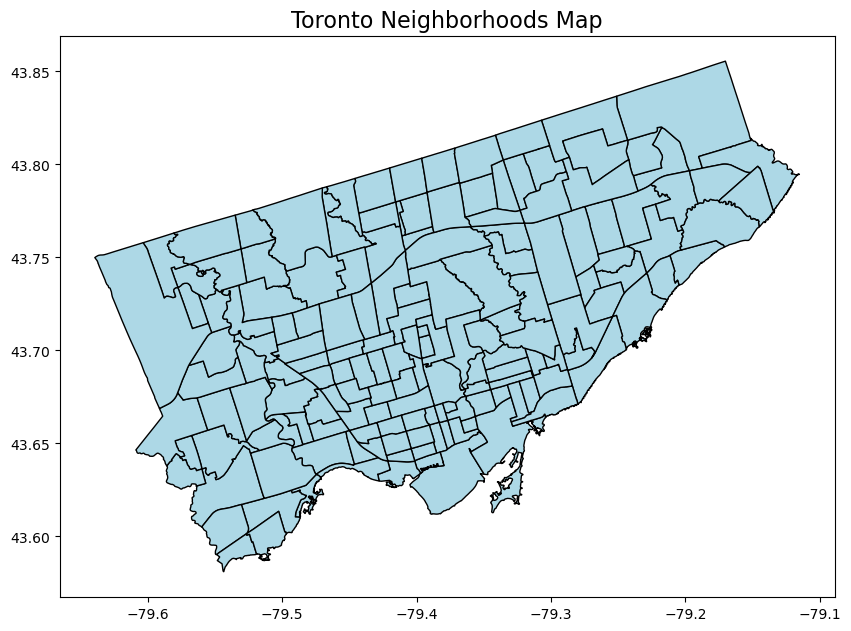

In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Plot the geometries
fig, ax = plt.subplots(figsize=(10, 10))
neighbourhoods_geo.plot(ax=ax, color='lightblue', edgecolor='black')

# Add titles and labels
ax.set_title("Toronto Neighborhoods Map", fontsize=16)
plt.show()

In [16]:
import folium

# Create a base map centered on Toronto
toronto_map = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Add neighborhood shapes to the map
for _, row in neighbourhoods_geo.iterrows():
    folium.GeoJson(
        row['geometry'],
        name=row['Neighbourhood'],
        tooltip=row['Neighbourhood']  # Display neighborhood name on hover
    ).add_to(toronto_map)

# Display the map
toronto_map.save("toronto_neighbourhoods.html")


In [17]:
print(neighbourhoods_geo.is_valid)  # Should return True for all rows

0      True
1      True
2      True
3      True
4      True
       ... 
153    True
154    True
155    True
156    True
157    True
Length: 158, dtype: bool


In [18]:
neighbourhoods_geo['geometry'] = neighbourhoods_geo['geometry'].buffer(0)

In [19]:
# Filter for income-related data
income_data = profiles_reshaped[
    profiles_reshaped['Characteristic'].str.contains("income", case=False, na=False)
]

print(income_data.head())

     _id Category                          Topic  \
944  945   Income  Income of individuals in 2015   
945  946   Income  Income of individuals in 2015   
946  947   Income  Income of individuals in 2015   
947  948   Income  Income of individuals in 2015   
948  949   Income  Income of individuals in 2015   

                        Data Source  \
944  Census Profile 98-316-X2016001   
945  Census Profile 98-316-X2016001   
946  Census Profile 98-316-X2016001   
947  Census Profile 98-316-X2016001   
948  Census Profile 98-316-X2016001   

                                        Characteristic    Neighbourhood  \
944  Total - Income statistics in 2015 for the popu...  Agincourt-North   
945    Number of total income recipients aged 15 ye...  Agincourt-North   
946      Median total income in 2015 among recipien...  Agincourt-North   
947    Number of after-tax income recipients aged 1...  Agincourt-North   
948      Median after-tax income in 2015 among reci...  Agincourt-North   

 

In [20]:
income_data.loc[:, 'Value'] = pd.to_numeric(income_data['Value'].str.replace(',', ''), errors='coerce')

C:\Users\raisa.nekhaeva\AppData\Local\Temp\ipykernel_13064\163665910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_data.loc[:, 'Value'] = pd.to_numeric(income_data['Value'].str.replace(',', ''), errors='coerce')
C:\Users\raisa.nekhaeva\AppData\Local\Temp\ipykernel_13064\163665910.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  income_data.loc[:, 'Value'] = pd.to_numeric(income_data['Value'].str.replace(',', ''), errors='coerce')


In [21]:
# Group by neighborhood and calculate average income
income_summary = income_data.groupby('Neighbourhood')['Value'].mean().reset_index()

# Rename columns for clarity
income_summary.columns = ['Neighbourhood', 'Average_Income']

print(income_summary.sort_values(by='Average_Income', ascending=False).head())  # Top neighborhoods
print(income_summary.sort_values(by='Average_Income').head())  # Lowest neighborhoods

                         Neighbourhood  Average_Income
122  Waterfront Communities-The Island   230733.166292
104                Rosedale-Moore Park   203885.637079
3                                Annex   159261.833708
16   Bridle Path-Sunnybrook-York Mills   143448.551685
9                 Bedford Park-Nortown   124312.712360
                    Neighbourhood  Average_Income
10        Beechborough-Greenbrook    12204.856180
107                        Rustic    15526.853933
38               Elms-Old Rexdale    15548.891011
117  Thistletown-Beaumond Heights    17406.271910
91                       Oakridge    17881.406742


In [22]:
# Merge income data with geometry
income_geo = pd.merge(neighbourhoods_geo, income_summary, on='Neighbourhood', how='inner')

print(income_geo.head())

   _id  AREA_ID  AREA_ATTR_ID  PARENT_AREA_ID AREA_SHORT_CODE AREA_LONG_CODE  \
0   23  2502344      26022859               0             140            140   
1   24  2502343      26022858               0             139            139   
2   25  2502342      26022857               0             138            138   
3   26  2502341      26022856               0             136            136   
4   27  2502340      26022855               0             135            135   

         Neighbourhood                  AREA_DESC  \
0            Guildwood            Guildwood (140)   
1  Scarborough Village  Scarborough Village (139)   
2        Eglinton East        Eglinton East (138)   
3            West Hill            West Hill (136)   
4          Morningside          Morningside (135)   

                         CLASSIFICATION CLASSIFICATION_CODE    OBJECTID  \
0  Not an NIA or Emerging Neighbourhood                  NA  17825089.0   
1        Neighbourhood Improvement Area           

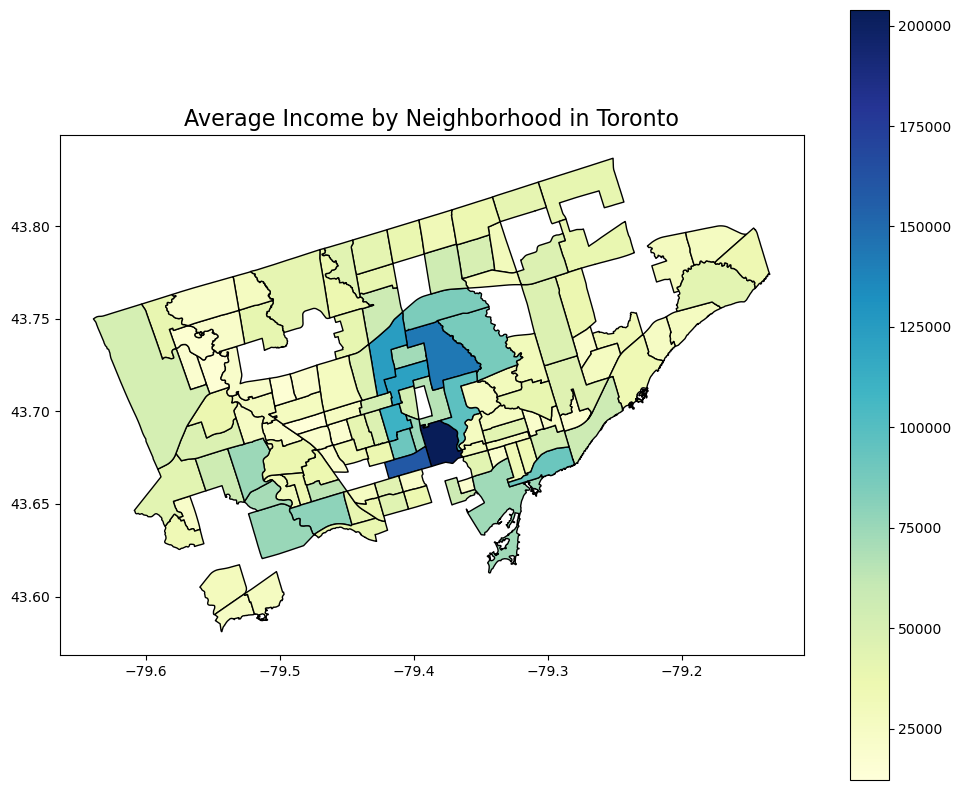

In [23]:
import matplotlib.pyplot as plt

# Plot neighborhoods colored by average income
fig, ax = plt.subplots(figsize=(12, 10))
income_geo.plot(
    column='Average_Income',
    cmap='YlGnBu',
    legend=True,
    edgecolor='black',
    ax=ax
)
ax.set_title('Average Income by Neighborhood in Toronto', fontsize=16)
plt.show()

In [24]:
import folium
from folium import Choropleth

# Create base map
toronto_map = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Add income data as a choropleth
Choropleth(
    geo_data=income_geo,
    data=income_geo,
    columns=['Neighbourhood', 'Average_Income'],
    key_on='feature.properties.Neighbourhood',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Income'
).add_to(toronto_map)

# Save and display the map
toronto_map.save("toronto_income_map.html")

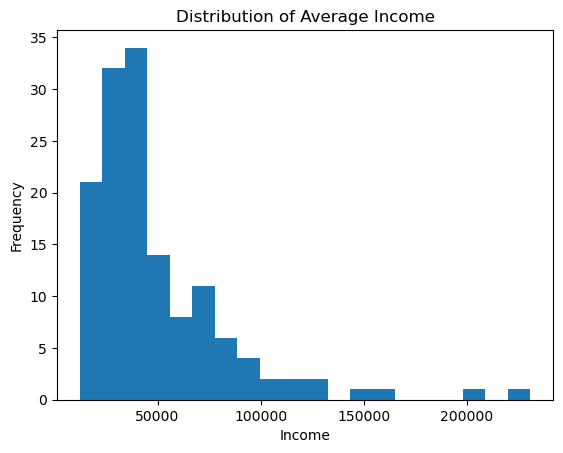

In [25]:
income_summary['Average_Income'].plot(kind='hist', bins=20, title='Distribution of Average Income')
plt.xlabel('Income')
plt.show()

In [26]:
print("Top 10 Wealthiest Neighborhoods:")
print(income_summary.sort_values(by='Average_Income', ascending=False).head(10))

print("Top 10 Poorest Neighborhoods:")
print(income_summary.sort_values(by='Average_Income').head(10))

Top 10 Wealthiest Neighborhoods:
                         Neighbourhood  Average_Income
122  Waterfront Communities-The Island   230733.166292
104                Rosedale-Moore Park   203885.637079
3                                Annex   159261.833708
16   Bridle Path-Sunnybrook-York Mills   143448.551685
9                 Bedford Park-Nortown   124312.712360
69                 Lawrence Park South   122170.782022
58          Islington-City Centre West   110812.191011
44                   Forest Hill South   110772.073034
129                    Willowdale East   109420.092135
87                             Niagara   109257.898876
Top 10 Poorest Neighborhoods:
                    Neighbourhood  Average_Income
10        Beechborough-Greenbrook    12204.856180
107                        Rustic    15526.853933
38               Elms-Old Rexdale    15548.891011
117  Thistletown-Beaumond Heights    17406.271910
91                       Oakridge    17881.406742
101               Rexdale-Kiplin

In [27]:
# Merge additional variables (e.g., population)
population_data = profiles_reshaped[
    profiles_reshaped['Characteristic'].str.contains("population", case=False, na=False)
]

population_data.loc[:, 'Value'] = pd.to_numeric(population_data['Value'].str.replace(',', ''), errors='coerce')
population_summary = population_data.groupby('Neighbourhood')['Value'].mean().reset_index()
population_summary.columns = ['Neighbourhood', 'Population']

# Merge population and income
income_population = pd.merge(income_summary, population_summary, on='Neighbourhood', how='inner')

# Correlation analysis
print(income_population.corr(numeric_only=True))

                Average_Income  Population
Average_Income        1.000000    0.552052
Population            0.552052    1.000000


C:\Users\raisa.nekhaeva\AppData\Local\Temp\ipykernel_13064\334562131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data.loc[:, 'Value'] = pd.to_numeric(population_data['Value'].str.replace(',', ''), errors='coerce')
C:\Users\raisa.nekhaeva\AppData\Local\Temp\ipykernel_13064\334562131.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  population_data.loc[:, 'Value'] = pd.to_numeric(population_data['Value'].str.replace(',', ''), errors='coerce')
